In [ ]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()  # This opens a file picker to upload files in Colab


Saving GroceryStoreDataset.zip to GroceryStoreDataset.zip


In [ ]:
# Assuming the ZIP file is uploaded, extract it
!unzip -q "GroceryStoreDataset.zip" -d "dataset"

In [ ]:
# Load the data
df_classes = pd.read_csv("dataset/GroceryStoreDataset/dataset/classes.csv")
df_train = pd.read_csv(
    "dataset/GroceryStoreDataset/dataset/train.txt",
    names=["path", "fine", "coarse"]
)
df_test = pd.read_csv(
    "dataset/GroceryStoreDataset/dataset/test.txt",
    names=["path", "fine", "coarse"]
)

In [ ]:
# Create a dictionary for class mapping
image_dic = dict(zip(df_classes['Coarse Class ID (int)'], df_classes['Coarse Class Name (str)']))

# Prepare training data
train_image_paths = [
    "dataset/GroceryStoreDataset/dataset/" + path for path in df_train['path']
]
train_images = [cv2.resize(cv2.imread(img), (180, 180)) for img in train_image_paths]
X_train = np.array(train_images) / 255.0
y_train = np.array(df_train['coarse'])

In [ ]:
# Prepare testing data
test_image_paths = [
    "dataset/GroceryStoreDataset/dataset/" + path for path in df_test['path']
]
test_images = [cv2.resize(cv2.imread(img), (180, 180)) for img in test_image_paths]
X_test = np.array(test_images) / 255.0
y_test = np.array(df_test['coarse'])


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Data augmentation
data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal", input_shape=(180, 180, 3)), # Removed 'experimental.preprocessing'
    layers.RandomRotation(0.5), # Removed 'experimental.preprocessing'
    layers.RandomZoom(0.5), # Removed 'experimental.preprocessing'
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Build the model
model = models.Sequential([
    data_augmentation,
    layers.Conv2D(86, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(43, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(43, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(86, activation='relu'),
    layers.Dense(43, activation='sigmoid'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 356s 4s/step - accuracy: 0.1165 - loss: 3.4286
Epoch 2/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 376s 4s/step - accuracy: 0.2546 - loss: 2.6884
Epoch 3/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 380s 4s/step - accuracy: 0.3149 - loss: 2.3346
Epoch 4/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 342s 4s/step - accuracy: 0.3900 - loss: 2.0210
Epoch 5/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 380s 4s/step - accuracy: 0.4153 - loss: 1.8746


In [ ]:
# Evaluate the model
model.evaluate(X_test, y_test)

78/78 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.3456 - loss: 2.0525


[1.9917049407958984, 0.38993963599205017]

In [ ]:
# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 484s 6s/step - accuracy: 0.4835 - loss: 1.6266 - val_accuracy: 0.3614 - val_loss: 2.1140
Epoch 2/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 433s 5s/step - accuracy: 0.4835 - loss: 1.5665 - val_accuracy: 0.4157 - val_loss: 2.0728
Epoch 3/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 424s 5s/step - accuracy: 0.5335 - loss: 1.3752 - val_accuracy: 0.4636 - val_loss: 1.8154
Epoch 4/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 477s 6s/step - accuracy: 0.5728 - loss: 1.2879 - val_accuracy: 0.4640 - val_loss: 1.8187
Epoch 5/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 421s 5s/step - accuracy: 0.6044 - loss: 1.1668 - val_accuracy: 0.4612 - val_loss: 2.1191


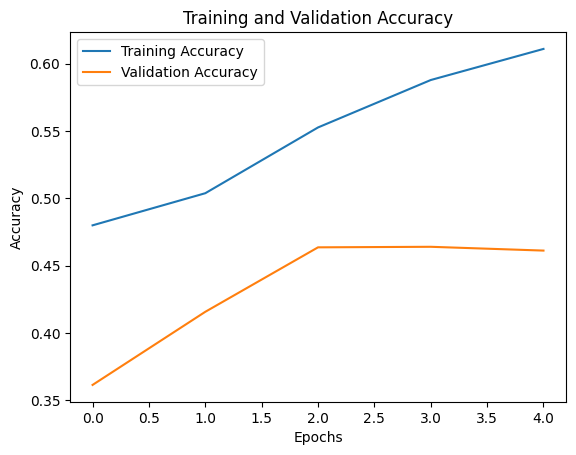

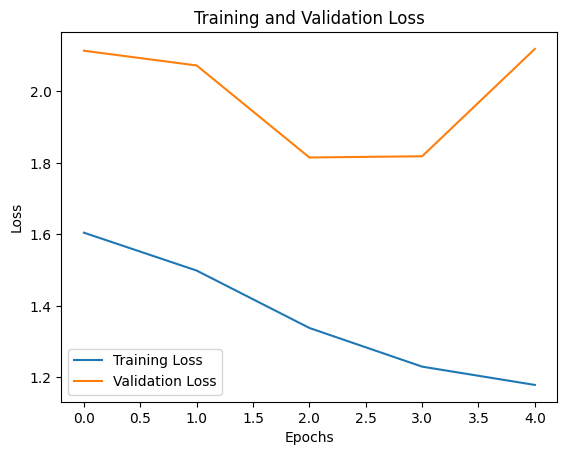

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


78/78 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step


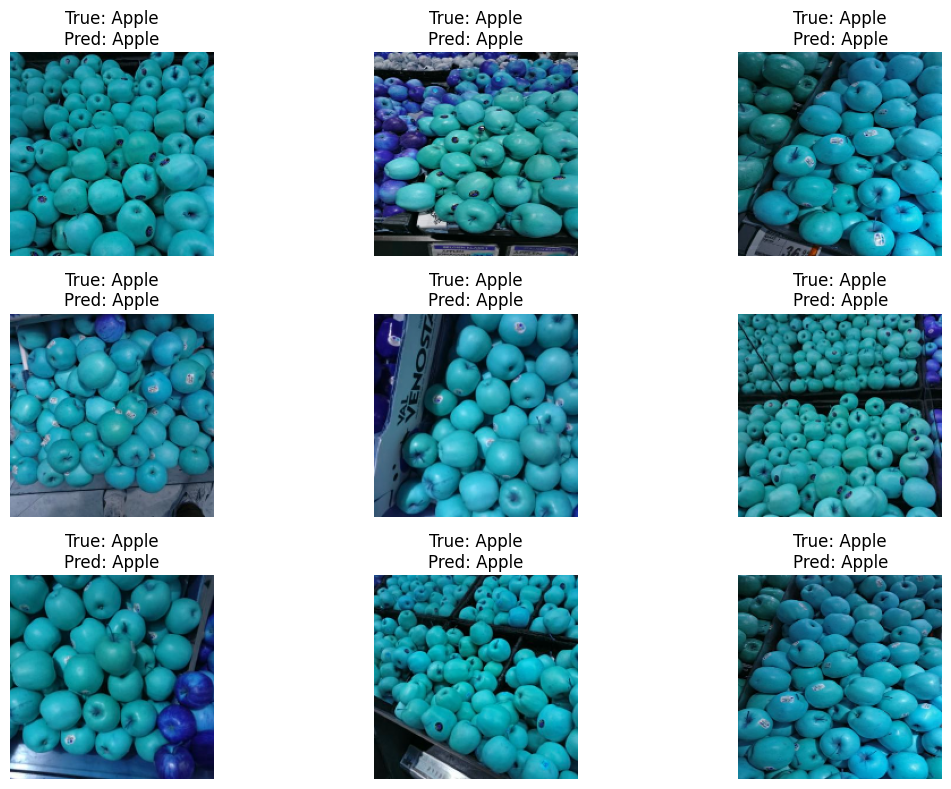

In [ ]:
# Predict on test data
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Visualize a few predictions
plt.figure(figsize=(12, 8))
for i in range(9):  # Display 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"True: {image_dic[y_test[i]]}\nPred: {image_dic[predicted_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


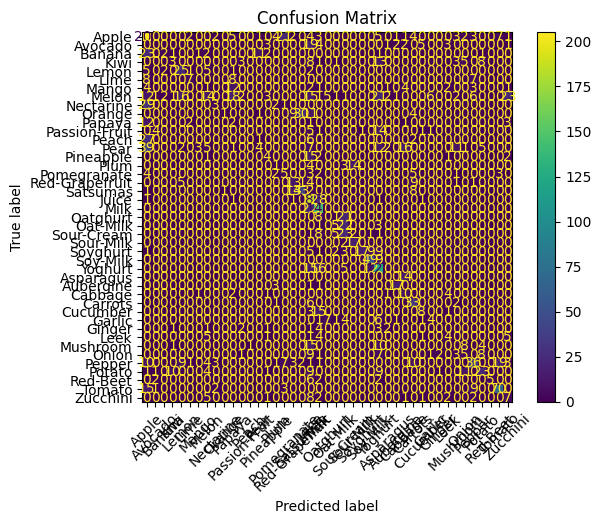

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(image_dic.values()))
disp.plot(cmap='viridis', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


### Grocery Store Image Classification Project Explanation

This project involves building a **Convolutional Neural Network (CNN)** to classify grocery items into predefined categories using a dataset of labeled images. Here's a detailed breakdown of the project:

1. **Objective**:
   The goal is to classify images of grocery items into coarse-grained categories (e.g., fruits, vegetables, beverages) using a machine learning model.

2. **Dataset**:
   - The dataset contains images of grocery items along with their fine and coarse labels.
   - It includes CSV files (`classes.csv`, `train.txt`, `test.txt`) specifying image paths and corresponding class labels.
   - Images are divided into training and testing datasets to evaluate the model.

3. **Preprocessing**:
   - Images are resized to a uniform size of `(180x180)` to ensure consistency across the input data.
   - Pixel values are normalized to a range of 0 to 1 to improve training efficiency.

4. **Data Augmentation**:
   - Techniques like flipping, rotation, and zooming are applied to artificially expand the dataset.
   - This helps the model generalize better by simulating variations in the data.

5. **Model Design**:
   - A **CNN architecture** is implemented with multiple layers:
     - **Convolutional Layers**: Extract features like edges, textures, and shapes.
     - **Pooling Layers**: Downsample feature maps to reduce computational cost.
     - **Dropout Layer**: Prevent overfitting by randomly deactivating neurons during training.
     - **Dense Layers**: Perform final classification into categories.

6. **Training**:
   - The model is trained on the processed training data for 5 epochs, using the Adam optimizer and sparse categorical cross-entropy loss.

7. **Evaluation**:
   - The model's accuracy is tested on unseen test data to measure its performance.
   - Metrics like loss and accuracy are evaluated.

8. **Visualization**:
   - Training progress (loss and accuracy) is plotted.
   - Predictions and the confusion matrix are visualized to analyze the model's strengths and weaknesses.

9. **Applications**:
   - This project could be extended to automate inventory management in grocery stores or assist in self-checkout systems by recognizing items.

This project demonstrates the use of CNNs for image classification tasks, emphasizing data preprocessing, augmentation, model design, and evaluation.

Here's a concise explanation of the code:

1. **Importing Libraries**: Essential libraries like `pandas`, `numpy`, and `tensorflow` are used for data handling, preprocessing, and model creation, while `cv2` handles image processing and `matplotlib` visualizes results.

2. **Data Upload and Extraction**: A dataset ZIP file is uploaded and extracted to access images and their class labels for training and testing.

3. **Data Loading**: CSV files (`classes.csv`, `train.txt`, and `test.txt`) are read to load paths and labels for the grocery dataset.

4. **Image Preprocessing**: Images are resized to a consistent shape `(180x180)` and normalized to prepare them for the model.

5. **Data Augmentation**: Random transformations like flips, rotations, and zooms are applied to training data to increase dataset variability and prevent overfitting.

6. **Model Architecture**: A Convolutional Neural Network (CNN) is designed with multiple layers (Convolutional, Pooling, Dropout, Dense) to learn image features and classify them.

7. **Compilation**: The model is compiled with the Adam optimizer and sparse categorical cross-entropy loss to train on multi-class image classification.

8. **Training and Validation**: The model is trained for 5 epochs using training data, while validation data evaluates its performance during training.

9. **Evaluation**: The model's accuracy and loss are evaluated on test data to gauge performance.

10. **Visualization**: Training history (accuracy/loss), predictions, and a confusion matrix are visualized to interpret and improve the model's results.